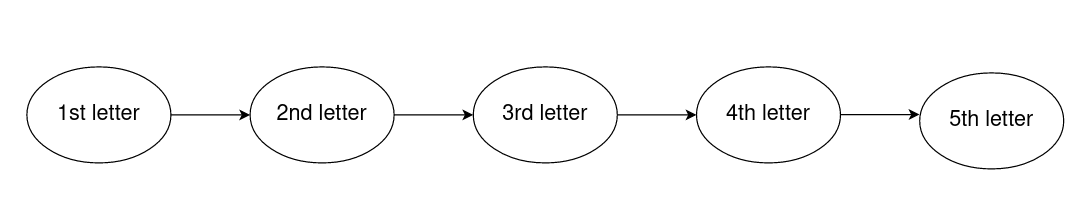

In [1]:
from IPython.display import Image
Image("BayesianNetworkSimple.png")

In [2]:
import numpy as np

In [3]:
letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T"
           , "U", "V", "W", "X", "Y", "Z"]

In [47]:
lines = []

with open('words.txt') as f:
    lines = f.readlines()

In [38]:
# probability first letter

probabilities_1 = [0] * 26

for word in lines: 
    index = letters.index(word[0])
    probabilities_1[index] += 1
    
probabilities_1 = [x / (len(lines) - 1) for x in probabilities_1]

In [48]:
import pandas as pd

pd.DataFrame.from_dict(
    dict(zip(letters, probabilities_1)), 
    columns=["freq"], 
    orient="index"
)

,freq
A,0.058446
B,0.069187
C,0.016599
D,0.041149
E,0.036825
F,0.055377
G,0.045474
H,0.052030
I,0.015344
J,0.015483


In [49]:
def calculate_conditional_probability(letter_index):

    count_prev_letter = np.zeros(26)
    probabilities = np.zeros([26, 26])

    for word in lines: 
        index_parent = letters.index(word[letter_index - 1])
        index = letters.index(word[letter_index])

        probabilities[index_parent][index] += 1
        count_prev_letter[index_parent] += 1

    probabilities = [[x / count_prev_letter[id_parent] if count_prev_letter[id_parent] > 0 else 0 for x in parent] for id_parent, parent in enumerate(probabilities)]
    
    # transpose result
    return [*zip(*probabilities)]

In [50]:
# P(2nd letter | 1st letter)

pd.DataFrame.from_dict(
    dict(zip(letters, calculate_conditional_probability(1))), 
    columns=letters, 
    orient="index"
)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,0.031026,0.207661,0.184874,0.220339,0.007576,0.193955,0.208589,0.316354,0.045455,0.252252,...,0.0,0.317333,0.155689,0.236842,0.000000,0.185567,0.291096,0.0,0.384615,0.185345
B,0.155131,0.000000,0.000000,0.000000,0.053030,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.0,0.000000,0.000000
C,0.026253,0.000000,0.000000,0.000000,0.049242,0.000000,0.000000,0.000000,0.018182,0.000000,...,0.0,0.000000,0.053892,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
D,0.033413,0.000000,0.000000,0.000000,0.026515,0.000000,0.000000,0.000000,0.072727,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
E,0.002387,0.241935,0.033613,0.159322,0.000000,0.186398,0.226994,0.252011,0.000000,0.171171,...,0.0,0.245333,0.128743,0.119617,0.000000,0.195876,0.311644,0.6,0.076923,0.185345
F,0.011933,0.000000,0.000000,0.000000,0.007576,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.0,0.000000,0.000000
G,0.031026,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.054545,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
H,0.031026,0.000000,0.210084,0.000000,0.022727,0.000000,0.000000,0.000000,0.072727,0.000000,...,0.0,0.000000,0.014970,0.033493,0.009615,0.000000,0.006849,0.0,0.000000,0.000000
I,0.007160,0.098790,0.042017,0.159322,0.143939,0.151134,0.101227,0.101877,0.000000,0.018018,...,0.0,0.138667,0.095808,0.083732,0.000000,0.350515,0.157534,0.0,0.000000,0.206897
J,0.000000,0.000000,0.000000,0.003390,0.000000,0.007557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.004785,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [59]:
# Bayesian Network

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianNetwork([("1", "2"), ("2", "3"), ("3", "4"), ("4", "5")])

cpd_1 = TabularCPD("1", 26, [[x] for x in probabilities_1])
cpd_2 = TabularCPD("2", 26, calculate_conditional_probability(1), evidence=["1"], evidence_card=[26])
cpd_3 = TabularCPD("3", 26, calculate_conditional_probability(2), evidence=["2"], evidence_card=[26])
cpd_4 = TabularCPD("4", 26, calculate_conditional_probability(3), evidence=["3"], evidence_card=[26])
cpd_5 = TabularCPD("5", 26, calculate_conditional_probability(4), evidence=["4"], evidence_card=[26])

# hm...
cpd_5.values[0][16] = 1

model.add_cpds(cpd_1, cpd_2, cpd_3, cpd_4, cpd_5)
model.check_model()

True

In [81]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

In [82]:
# Getting all the local independencies in the network.
model.local_independencies(["1", "2", "3", "4", "5"])

(3 ⟂ 1 | 2)
(4 ⟂ 1, 2 | 3)
(5 ⟂ 1, 3, 2 | 4)

In [83]:
letter_1 = infer.query(["1"]).values.argmax()
letter_2 = infer.query(["2"], evidence={"1": letter_1}).values.argmax()
letter_3 = infer.query(["3"], evidence={"1": letter_1, "2": letter_2}).values.argmax()
letter_4 = infer.query(["4"], evidence={"1": letter_1, "2": letter_2, "3": letter_3}).values.argmax()
letter_5 = infer.query(["5"], evidence={"1": letter_1, "2": letter_2, "3": letter_3, "4": letter_4}).values.argmax()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [84]:
print(letters[letter_1] + letters[letter_2] + letters[letter_3] + letters[letter_4] + letters[letter_5])

STANE
